In [2]:
import os
#Local Path to modules (PYTHONPATH)
PYLOCAL = 'C:\\Users\\flr\\rzgshare\\work\\W7X\\python\\git' 
os.chdir(PYLOCAL)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import sys
#sys.path.append()
#print(sys.path)

In [9]:
import diagnostics.w7x.coils as coils; reload(coils); cl = coils.COILS()
pid = '20181010.036'  #Detachment ICC
tr = cl.read_pidtime(pid)
cur = cl.read(tr)

C:\Program Files\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\simplejson\encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2020-10-22 17:11:50.824508. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [10]:
import diagnostics.w7x.coils as coils; reload(coils); cl = coils.COILS()
t, dt = 2.2, 0.1
mcur,scur = cl.get_time(cur,[t-dt,t+dt],iota=False)
cid,icur = cl.iota_correction(mcur)
cl.print_currents(mcur)
#Tentatively assume EJM-like
if cid is None: icur = -550.
icur = np.mean(mcur['Main'][5:7])-icur
print('Found iota correction for %s' %cid)
print('Set iota correction to %.2f' %icur)

Time window: 2.20s (dt=0.10s)
Non-planar
[13563. 13563. 13563. 13563.]
Planar
[13563. 13563.]
Control
[1000.61022949 1002.32382057  999.19637044 1003.54694039  999.68380592
 1000.40738932 1000.19242932  994.87001982  986.36567179 1020.10454741]
Trim
[-96.52054342   0.47743055  96.97145081  60.15625    -60.26234563]
Ip
[359.14187422]
Correction
0.0
Found iota correction for None
Set iota correction to 14113.00


C:\Program Files\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\simplejson\encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2020-10-22 17:12:00.211637. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
step=0.01;steps=100;init='lin';nr=22
phi=0.#108.
lim1 = [470,471,472,473,474]
lim2 = [479,480,481,482,483]

In [4]:
import utils.geom as geom; reload(geom)
import geometry.w7x.meshsrv as wall; reload(wall); wall = wall.WALL()
wall.set_wall([2,5,6,7,9,13,14,15,16,17,21])
wc = wall.cut_wall_phi(phi)

In [1]:
import geometry.w7x.fieldlinetracer as flt; importlib.reload(flt)
tracer = flt.TRACER()
IP = [-15.E3]*5   #modular coil currents
IP.extend([0.]*2) #planar coil currents
Itc = np.zeros(5) #trim coils currents
Icc = np.zeros(10) #control coil currents
tracer.set_currents(IP,Itc,Icc)
tracer.set_plasmacurrent(0.) #Plasma current

In [5]:
tracer.set_traceinit(init,nr=nr) #Set initial points to start tracing from
tracer.poincare_phi(phi,step=step,steps=steps)
res = tracer.trace()

In [6]:
import geometry.w7x.fieldlinetracer as flt; importlib.reload(flt)
tracer = flt.TRACER()
IP = [14.188E3]*5   #modular coil currents
IP.extend([-9790.]*2) #planar coil currents
Itc = np.zeros(5) #trim coils currents
Itc = np.array([-134,-41,108,108,-41])*5.
Icc = np.zeros(10) #control coil currents
tracer.set_currents(IP,Itc,Icc,fexp=True)
tracer.set_plasmacurrent(0.) #Plasma current

In [7]:
tracer.set_traceinit(init,nr=nr) #Set initial points to start tracing from
tracer.poincare_phi(phi,step=step,steps=steps)
res2 = tracer.trace()

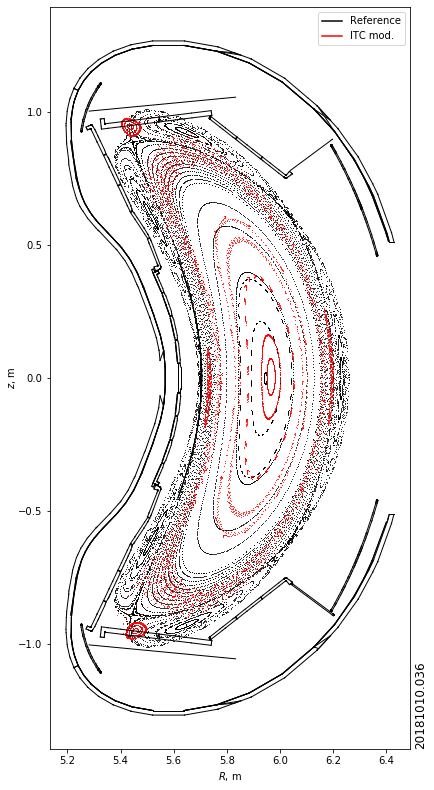

C:\Program Files\WinPython-64bit-3.6.1.0Qt5\python-3.6.1.amd64\lib\site-packages\simplejson\encoder.py:291: DeprecationWarning: Interpreting naive datetime as local 2020-10-22 17:12:06.746010. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
fig = plt.figure(figsize=(10.3,10.3))
fig = tracer.plot_poincare(res ,color='k',fig=fig,shw=False)
fig = tracer.plot_poincare(res2,color='r',fig=fig,shw=False)
plt.plot([],'k',label='Reference')
plt.plot([],'r',label='ITC mod.')
#plt.plot([],'b',label='NPC+NPA+IOTA')
#plt.plot([],'y',label='VMEC')
plt.legend()
fig = wall.plot_wall(wc,fig=fig)

ax = fig.gca()
_ = ax.text(1.01,0.0,pid,transform=ax.transAxes,ha='left',\
        rotation=90,va='bottom',fontsize=12)
#fig = vmec.plot(fs,color='y',fig=fig,shw=True)